In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

In [7]:
df_clust = joblib.load('salidas/df_WithTarget.pkl')
df_clust.head()

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,...,HomeOwnership_Own,HomeOwnership_Rent,Education_Bachelor,Education_High School,Education_Masters,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
0,0.153005,0.016528,0.099691,0.028169,0.000000,0.105263,0.860918,0.473684,0.965517,0.620690,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.393443,0.138818,0.016119,0.394366,0.555556,0.421053,0.325016,0.684211,0.000000,0.310345,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.615665,0.391192,0.591818,0.873239,0.555556,0.368421,0.047852,0.315789,0.862069,0.310345,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.114754,0.463579,0.108542,0.507042,1.000000,0.000000,0.965361,0.263158,0.758621,0.103448,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.918033,0.504890,0.102869,0.760563,0.111111,0.526316,0.364656,0.947368,0.655172,0.172414,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [8]:
df_clust = df_clust.drop(columns=['NoPaidPerc'])

## <font color = '157699'> Gráfico de inercia

In [9]:
# Número optimo de K
inertia_list = []

for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, init= 'k-means++' , random_state=3)
    kmeans.fit(df_clust)
    inertia_list.append(kmeans.inertia_)

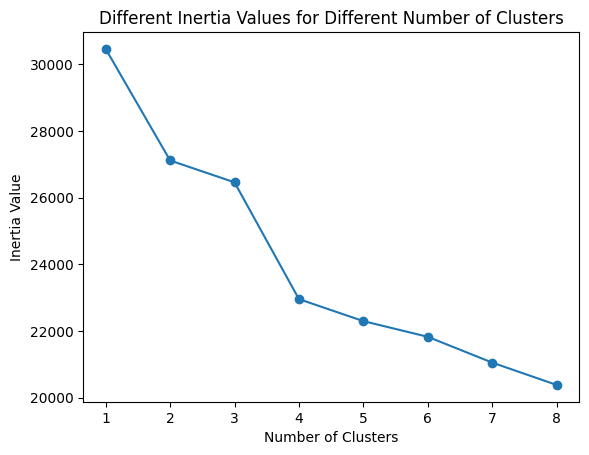

In [10]:
# plot the inertia curve
plt.plot(range(1,9),inertia_list)
plt.scatter(range(1,9),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

## <font color = '157699'> Método del Codo

In [11]:
# Argumentos del algoritmo kmeans
kmeans_kwargs = {"init": 'random', "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K, metricas de evaluacion
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 9):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_clust)
  sse.append(kmeans.inertia_)

C:\Users\leeon\AppData\Local\Temp\ipykernel_18884\2901427204.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


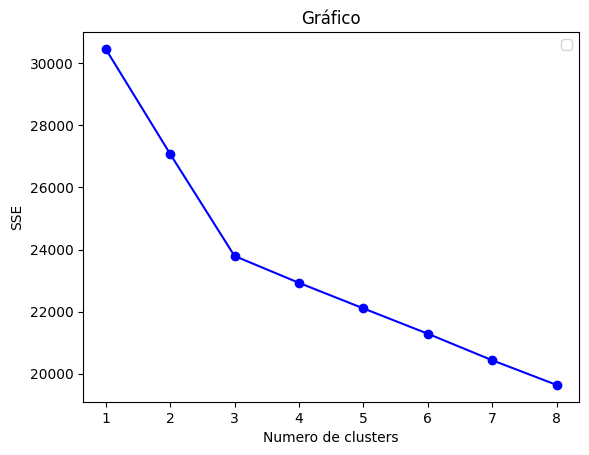

In [12]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,9), sse, color='blue', marker='o')

# Personalizar el gráfico
ax.set_title('Gráfico')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')
ax.legend()

# Mostrar el gráfico
plt.show()

## <font color = '157699'> Coeficiente de Silueta

In [13]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 9):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_clust)
  score = silhouette_score(df_clust, kmeans.labels_)
  silhouette_coefficients.append(score)

C:\Users\leeon\AppData\Local\Temp\ipykernel_18884\1585512494.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


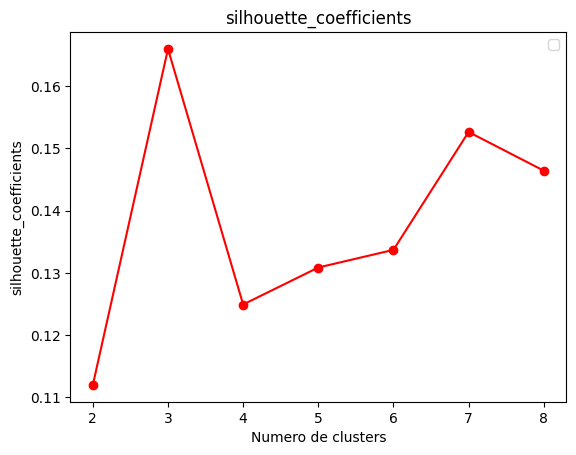

In [14]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,9), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

plt.show()

In [15]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 9),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

3

## <font color = '157699'> Modelo Base KMeans

In [16]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=3,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(df_clust)
# Coordenadas de los centroides
print('Coordenadas de los centroides: \n', kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones:",kmeans.n_iter_)
# metricas
print('Inertia:', kmeans.inertia_)
print('Silhouette Score:', silhouette_score(df_clust, kmeans.labels_))
print('Calinski harabasz score:', calinski_harabasz_score(df_clust, kmeans.labels_))

Coordenadas de los centroides: 
 [[ 5.02839387e-01  5.03755450e-01  5.07401095e-01  4.81855000e-01
   5.00248830e-01  4.96424699e-01  4.98390335e-01  4.95104587e-01
   5.02682221e-01  4.95649756e-01  1.00000000e+00  4.38538095e-15
   5.55111512e-17  2.55598686e-01  2.59181845e-01  2.48432368e-01
   2.36787101e-01  2.62765004e-01  2.40668856e-01  2.57091669e-01
   2.39474470e-01]
 [ 5.08908595e-01  4.95336253e-01  4.93007163e-01  5.05535071e-01
   4.96794872e-01  4.96441165e-01  4.91946342e-01  4.95053546e-01
   5.07551125e-01  5.00010696e-01 -3.33066907e-15  1.00000000e+00
  -6.66133815e-16  2.58995037e-01  2.56823821e-01  2.41935484e-01
   2.42245658e-01  2.46588089e-01  2.46898263e-01  2.38833747e-01
   2.67679901e-01]
 [ 5.05580616e-01  5.00049388e-01  4.97308389e-01  5.00828138e-01
   5.03906883e-01  4.99608373e-01  5.01092869e-01  5.07732711e-01
   5.00216335e-01  4.96282060e-01 -3.38618023e-15  3.83026943e-15
   1.00000000e+00  2.50948351e-01  2.44820543e-01  2.55617158e-01
   2.

In [17]:
#Predecir valores de etiquetas
tablafinal = df_clust.copy()
cluster_1 = kmeans.fit_predict(df_clust)
tablafinal["cluster_1"] = cluster_1

In [18]:
tablafinal["cluster_1"].value_counts()

cluster_1
2    3427
0    3349
1    3224
Name: count, dtype: int64

## <font color = '157699'> PCA 3 Clústeres 2 Componentes

In [19]:
pca = PCA(n_components=2).fit(df_clust)
pca.n_components_

2

In [20]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})
PCA_variance

,Varianza explicada (%)
0,11.160449
1,10.777654


In [21]:
clust3_pca2 = pca.fit_transform(df_clust)

In [22]:
# Modelo kmeans con 3 clústeres y 2 componentes
kmeans_pca2 = KMeans(init="k-means++",
                n_clusters=3,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans_pca2.fit(clust3_pca2)
# Coordenadas de los centroides
print('Coordenadas de los centroides: \n', kmeans_pca2.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones:",kmeans_pca2.n_iter_)
# metricas
print('Inertia:', kmeans_pca2.inertia_)
print('Silhouette Score:', silhouette_score(clust3_pca2, kmeans_pca2.labels_))
print('Calinski harabasz score:', calinski_harabasz_score(clust3_pca2, kmeans_pca2.labels_))

Coordenadas de los centroides: 
 [[-0.64318268 -0.49560472]
 [ 0.75219602 -0.28456201]
 [-0.13143826  0.8172997 ]]
Numero de iteraciones: 2
Inertia: 49.395339178315275
Silhouette Score: 0.937504442774942
Calinski harabasz score: 671297.1080994542


In [23]:
#Predecir valores de etiquetas
cluster_2 = kmeans_pca2.fit_predict(clust3_pca2)
tablafinal["cluster_2"]=cluster_2

In [24]:
tablafinal["cluster_2"].value_counts()

cluster_2
1    3427
0    3349
2    3224
Name: count, dtype: int64

## <font color = '157699'> Cargar las componentes en las variables

In [29]:
tablacargas = df_clust.copy()
tablacargas['PCA1'] = clust3_pca2[:,0]
tablacargas['PCA2'] = clust3_pca2[:,1]
tablacargas

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,...,Education_Bachelor,Education_High School,Education_Masters,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,PCA1,PCA2
0,0.153005,0.016528,0.099691,0.028169,0.000000,0.105263,0.860918,0.473684,0.965517,0.620690,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.688329,-0.517622
1,0.393443,0.138818,0.016119,0.394366,0.555556,0.421053,0.325016,0.684211,0.000000,0.310345,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.731734,-0.241893
2,0.615665,0.391192,0.591818,0.873239,0.555556,0.368421,0.047852,0.315789,0.862069,0.310345,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.717986,-0.304193
3,0.114754,0.463579,0.108542,0.507042,1.000000,0.000000,0.965361,0.263158,0.758621,0.103448,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.111918,0.892356
4,0.918033,0.504890,0.102869,0.760563,0.111111,0.526316,0.364656,0.947368,0.655172,0.172414,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.101757,0.854113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.269581,0.602633,0.209750,0.056338,1.000000,1.000000,0.884186,1.000000,0.172414,0.068966,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.801476,-0.215503
9996,0.624772,0.634003,0.261385,0.943662,0.333333,0.052632,0.317593,0.210526,0.000000,0.034483,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.704520,-0.243261
9997,0.719490,0.019682,0.251706,0.338028,0.444444,0.157895,0.426616,0.947368,0.137931,0.206897,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.716952,-0.310032
9998,0.158470,0.174241,0.528604,0.028169,0.333333,0.526316,0.967941,0.000000,0.379310,0.172414,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.648962,-0.541572


<Axes: >

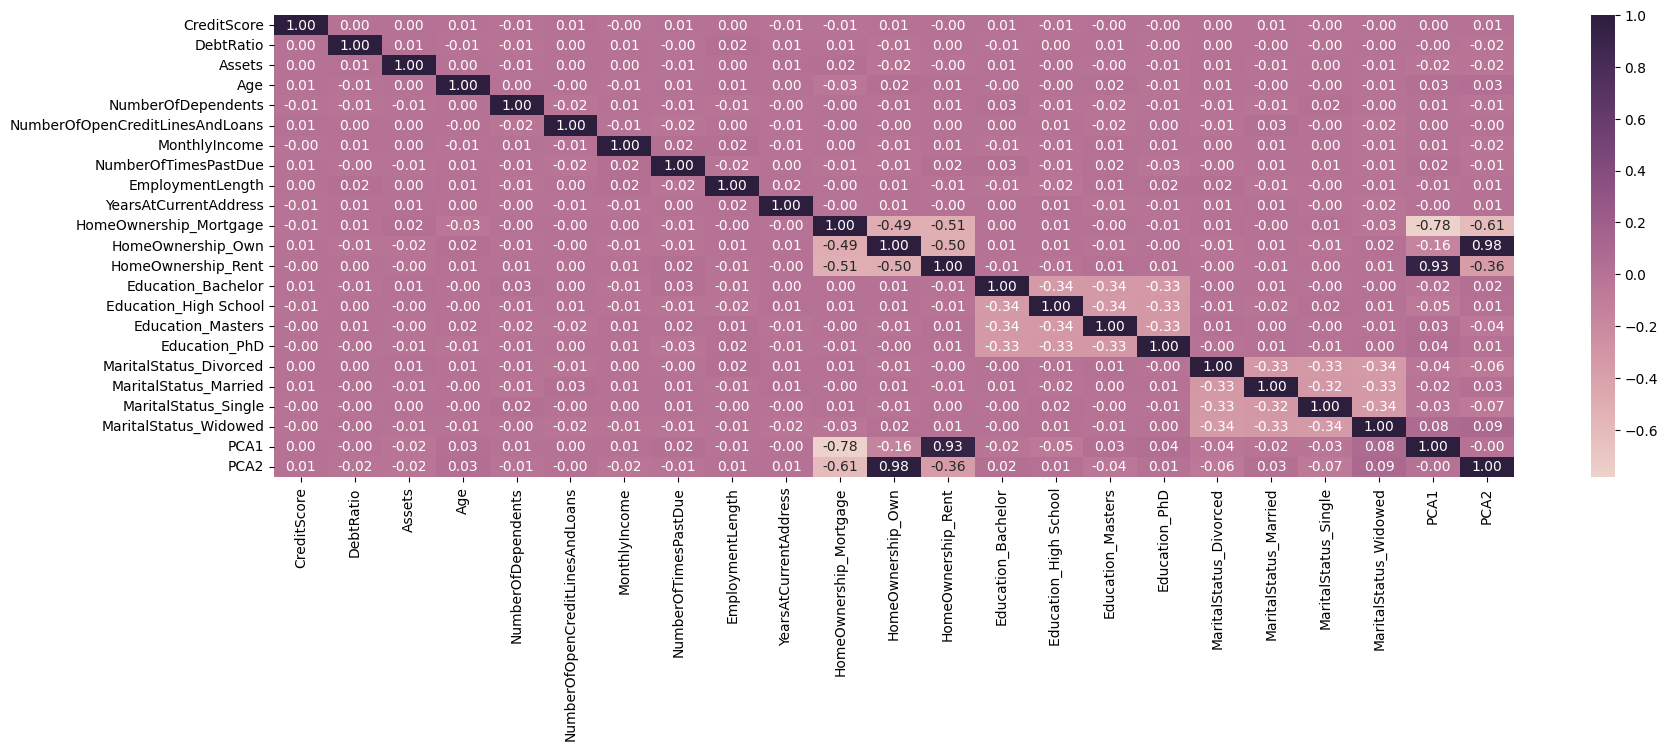

In [30]:
plt.figure(figsize=(20,6))
sns.heatmap(tablacargas.corr(),cmap = sns.cubehelix_palette(as_cmap=True),
            annot = True, fmt = ".2f")

In [31]:
# Crear un DataFrame con los pesos de las componentes principales
pca_loadings = pd.DataFrame(
    pca.components_.T,  # Transponer para tener variables en filas
    columns=[f'PCA{i+1}' for i in range(pca.n_components_)],  # Nombres de componentes principales
    index=df_clust.columns  # Nombres de las variables originales
)

# Mostrar los pesos
print("Pesos de las variables en las componentes principales:")
print(pca_loadings.round(2))


Pesos de las variables en las componentes principales:
                                 PCA1  PCA2
CreditScore                      0.00  0.01
DebtRatio                       -0.00 -0.01
Assets                          -0.01 -0.01
Age                              0.01  0.02
NumberOfDependents               0.00 -0.01
NumberOfOpenCreditLinesAndLoans  0.00 -0.00
MonthlyIncome                    0.00 -0.01
NumberOfTimesPastDue             0.01 -0.01
EmploymentLength                -0.00  0.01
YearsAtCurrentAddress           -0.00  0.00
HomeOwnership_Mortgage          -0.63 -0.51
HomeOwnership_Own               -0.12  0.80
HomeOwnership_Rent               0.76 -0.30
Education_Bachelor              -0.01  0.02
Education_High School           -0.04  0.01
Education_Masters                0.02 -0.03
Education_PhD                    0.03  0.01
MaritalStatus_Divorced          -0.03 -0.04
MaritalStatus_Married           -0.01  0.02
MaritalStatus_Single            -0.02 -0.05
MaritalStatus_Widowed

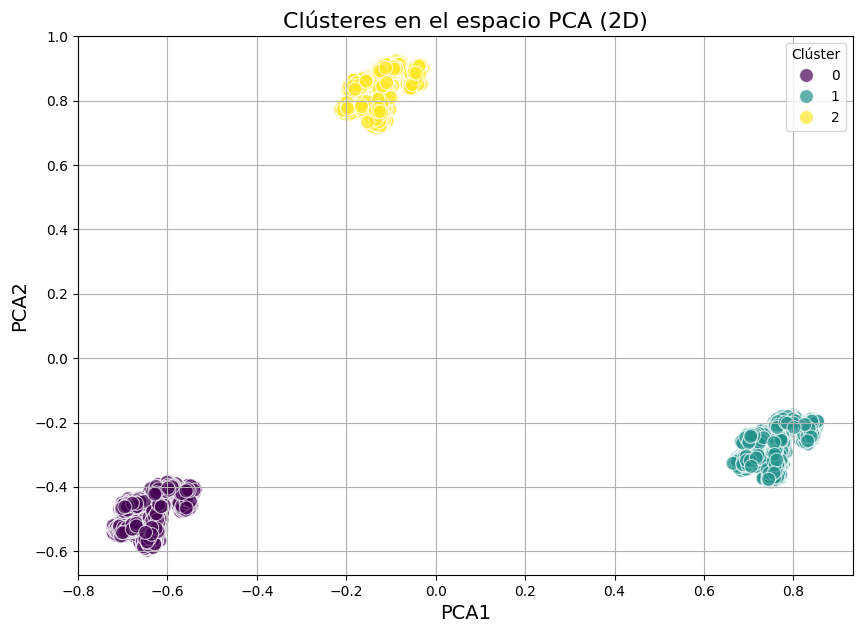

In [32]:
# Gráfica en 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=tablacargas['PCA1'], 
    y=tablacargas['PCA2'], 
    hue=tablafinal['cluster_2'],
    palette='viridis',
    s=100,
    alpha=0.7
)
plt.title('Clústeres en el espacio PCA (2D)', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Clúster')
plt.grid(True)
plt.show()


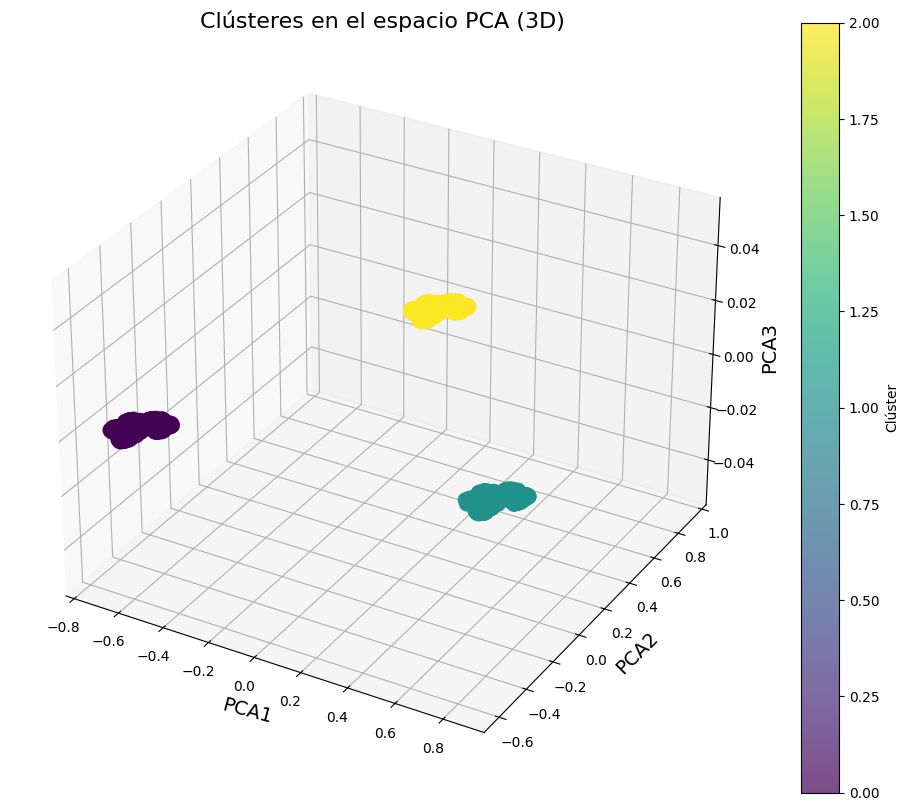

In [33]:
from mpl_toolkits.mplot3d import Axes3D

tablacargas['PCA3'] = clust3_pca2[:, 2] if clust3_pca2.shape[1] > 2 else 0

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tablacargas['PCA1'], 
    tablacargas['PCA2'], 
    tablacargas['PCA3'], 
    c=tablafinal['cluster_2'],
    cmap='viridis',
    s=100,
    alpha=0.7
)

ax.set_title('Clústeres en el espacio PCA (3D)', fontsize=16)
ax.set_xlabel('PCA1', fontsize=14, rotation = 345)
ax.set_ylabel('PCA2', fontsize=14, rotation = 45)
ax.set_zlabel('PCA3', fontsize=14, rotation = 90)
fig.colorbar(scatter, ax=ax, label='Clúster')
plt.show()


In [34]:
explained_variance = pca.explained_variance_ratio_ * 100
print("Varianza explicada por cada componente principal (%):")
for i, var in enumerate(explained_variance, 1):
    print(f"PCA{i}: {var:.2f}%")


Varianza explicada por cada componente principal (%):
PCA1: 11.16%
PCA2: 10.78%


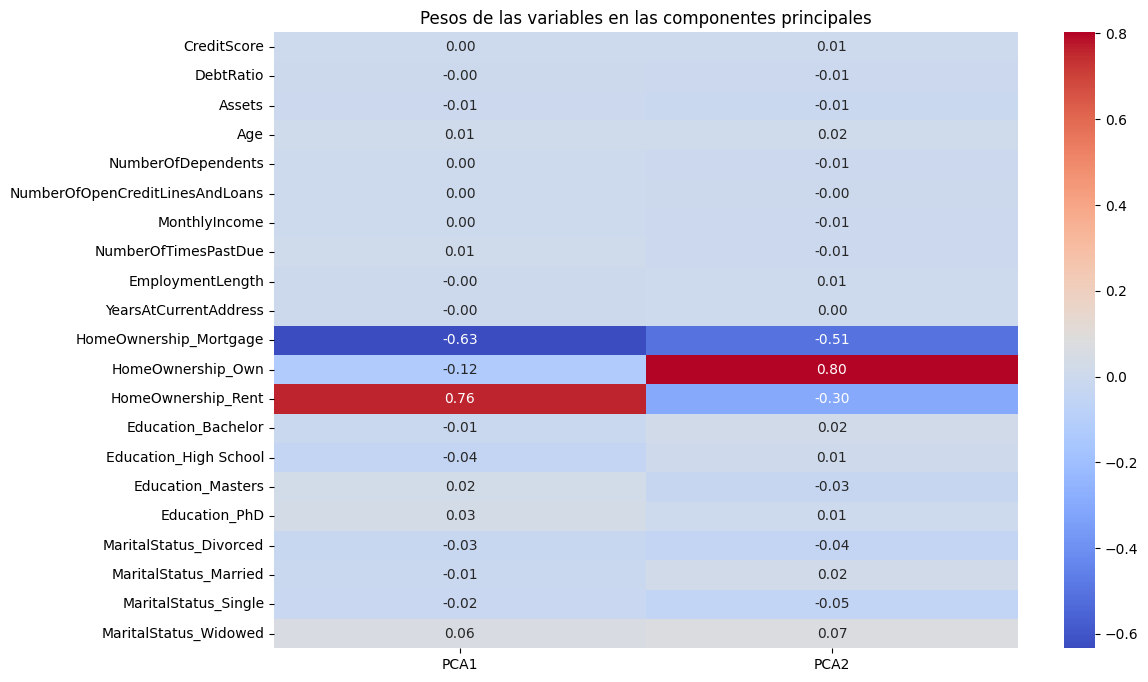

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(pca_loadings, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pesos de las variables en las componentes principales")
plt.show()


In [36]:
df_clust = tablacargas 
del tablacargas

In [42]:
#%pip install plotly
import plotly.express as px

df_temp = pd.DataFrame({'x': clust3_pca2[:, 0], 'y': clust3_pca2[:, 1],'label': cluster_2})
df_temp['label'] = df_temp['label'].astype(str)

fig = px.scatter_3d(df_temp, x="x", y="y", color="label")
fig.update_layout(width=1000, height=700)
fig.show(config={'displayModeBar': False})
plt.show()

---

In [37]:
joblib.dump(df_clust, 'salidas/df_clust.pkl')

['salidas/df_clust.pkl']